In [1]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
ctrl_max = pd.read_csv('data/ctrl_max.csv')
ctrl_min = pd.read_csv('data/ctrl_min.csv')
rcp_max = pd.read_csv('data/rcp_max.csv')
rcp_min = pd.read_csv('data/rcp_min.csv')
ctrl_pcp = pd.read_csv('data/20c_precip.csv')
rcp_pcp = pd.read_csv('data/rcp_precip.csv')


In [3]:
# filter times
rcp_max = rcp_max[rcp_max.time > '2081-01-01 12:00:00']
rcp_min = rcp_min[rcp_min.time > '2081-01-01 12:00:00']
rcp_pcp = rcp_pcp[rcp_pcp.time > '2081-01-01 12:00:00']
#vals = rcp_pcp.values
#vals = vals * 8640000
#rcp_pcp.values = vals


In [4]:
rcp_max

,member_id,time,lat,lon,TREFHTMX
27376,1,2081-01-02 12:00:00,49.47644,236.25,275.16858
27377,1,2081-01-03 12:00:00,49.47644,236.25,280.75934
27378,1,2081-01-04 12:00:00,49.47644,236.25,277.68463
27379,1,2081-01-05 12:00:00,49.47644,236.25,277.73572
27380,1,2081-01-06 12:00:00,49.47644,236.25,277.79782
...,...,...,...,...,...
1386995,105,2100-12-27 12:00:00,49.47644,236.25,285.86792
1386996,105,2100-12-28 12:00:00,49.47644,236.25,285.28580
1386997,105,2100-12-29 12:00:00,49.47644,236.25,285.49188
1386998,105,2100-12-30 12:00:00,49.47644,236.25,287.23053


In [5]:
def perform_comparison(control_dataset, future_dataset, high, datastring, units):
    control_dataset = control_dataset.dropna()
    future_dataset = future_dataset.dropna()

    
    # bounds for plotting
    max = np.max(future_dataset)
    min = np.min(control_dataset)
    
    # determine threshold 
    if high:
        threshold = control_dataset.quantile(1-1/10/365.25*4)
    else:
        threshold = control_dataset.quantile(1/10/365.25*4)
        
    print('threshold is ' + str(threshold))
    
    # plot temperature distribution in control climate
    bins = np.linspace(min, max, 50)
    histogram, bins = np.histogram(control_dataset, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    pdf = stats.norm.pdf(bin_centers)
    plt.figure(figsize=(6, 4))
    plt.plot(bin_centers, histogram, label="Histogram of samples")
    plt.axvline(x = threshold, color = 'r')
    plt.title("PDF of " + datastring + " in Control Climate")
    plt.xlabel(units)
    plt.xlim([min, max])
    #plt.ylim([0, .1])
    plt.show()
    plt.clf()
    
    # mean in historical climate
    control_average = control_dataset.mean()
    print("Average in control dataset: " + str(control_average))
    
    # fraction of time above threshold in control climate
    if high:
        frac_control = len(control_dataset[control_dataset>=threshold])/len(control_dataset)
    else:
        frac_control = len(control_dataset[control_dataset<=threshold])/len(control_dataset)
    print("Fraction of control with extreme value: " + str(frac_control))
    if frac_control != 0:
        years = 4/365.25/frac_control
    else:
        years = "infinity"
    
    print("Occurs once every " + str(years) + " years")
    
    # plot temperature distribution in control climate
    bins = np.linspace(min, max, 50)
    histogram, bins = np.histogram(future_dataset, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    pdf = stats.norm.pdf(bin_centers)
    plt.figure(figsize=(6, 4))
    plt.plot(bin_centers, histogram, label="Histogram of samples")
    plt.axvline(x = threshold, color = 'r')
    plt.title("PDF of " + datastring + " in Modelled Future Climate")
    plt.xlabel(units)
    plt.xlim([min, max])
    #plt.ylim([0, .1])
    plt.show()
    plt.clf()
    
    future_average = future_dataset.mean()
    print("Average in future dataset: " + str(future_average))
    
    # fraction of time above threshold in Future climate
    if high:
        frac_future = len(future_dataset[future_dataset>=threshold])/len(future_dataset)
    else:
        frac_future = len(future_dataset[future_dataset<=threshold])/len(future_dataset)
    print("Fraction of future with extreme value: " + str(frac_future))
    if frac_future != 0:
        years = 4/365.25/frac_future
    else:
        years = "infinity"
    print("Occurs once every " + str(years) + " years")
    
    # what about if the max temp distribution hadn't changed, just shifted?
    shift = future_average - control_average
    print("\n Shift by "+ str(shift))
    
    # just shift temps from control
    control_shifted = control_dataset + shift

    # plot temperature distribution in shifted control
    bins = np.linspace(min, max, 50)
    histogram, bins = np.histogram(control_shifted, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    pdf = stats.norm.pdf(bin_centers)
    plt.figure(figsize=(6, 4))
    plt.plot(bin_centers, histogram, label="Histogram of samples")
    plt.axvline(x = threshold, color = 'r')
    plt.title("PDF of " + datastring + " in Shifted Control Climate Climate")
    plt.xlabel(units)
    plt.xlim([min, max])
    #plt.ylim([0, .1])
    plt.show()
    plt.clf()
    
    shifted_average = control_shifted.mean()
    print("Average in shifted dataset: " + str(shifted_average))
    
    # fraction of time above threshold in shifted climate
    if high:
        frac_shift = len(control_shifted[control_shifted>=threshold])/len(control_shifted)
    else:
        frac_shift = len(control_shifted[control_shifted<=threshold])/len(control_shifted)
    print("Fraction of future with extreme value: " + str(frac_shift))
    if frac_shift != 0:
        years = 4/365.25/frac_shift
    else:
        years = "infinity"
        
    print("Occurs once every " + str(years) + " years")
    
    if frac_future == frac_shift:
        print("\n This Extreme Event is equally common in the modelled future climate and shifted control climate")
    elif frac_future > frac_shift:
        print("\n This Extreme Event is more common in the modelled future climate than shifted control climate")
    else:
        print("\n This Extreme Event is more common in the shifted control climate than the modelled future climate")
        
    # we can plot all the distributions for visual comparison
    plt.figure(figsize=(6, 4))

    histogram1, bins = np.histogram(control_dataset, bins=bins, density=True)
    bin1_centers = 0.5*(bins[1:] + bins[:-1])
    pdf1 = stats.norm.pdf(bin1_centers)
    plt.plot(bin1_centers, histogram1, label="Control")

    histogram2, bins = np.histogram(future_dataset, bins=bins, density=True)
    bin2_centers = 0.5*(bins[1:] + bins[:-1])
    pdf2 = stats.norm.pdf(bin2_centers)
    plt.plot(bin1_centers, histogram2, label="Future")

    histogram3, bins = np.histogram(control_shifted, bins=bins, density=True)
    bin3_centers = 0.5*(bins[1:] + bins[:-1])
    pdf3 = stats.norm.pdf(bin3_centers)
    plt.plot(bin3_centers, histogram3, label="Control Shifted")

    plt.legend()
    plt.axvline(x = threshold, color = 'r')
    plt.xlim([min, max])
    #plt.ylim([0, .1])
    plt.xlabel(units)
    plt.title("PDF of " + datastring + " in Each Modelled Climate")
    plt.show()
    plt.clf()
    
    
    
    #Counts for Chi squared:
    if high:
        a = len(control_shifted[control_shifted>threshold])
        b = len(control_shifted) - len(control_shifted[control_shifted>threshold])
        c = len(future_dataset[future_dataset>threshold])
        d = len(future_dataset) - len(future_dataset[future_dataset>threshold])
    else:
        a = len(control_shifted[control_shifted<threshold])
        b = len(control_shifted) - len(control_shifted[control_shifted<threshold])
        c = len(future_dataset[future_dataset<threshold])
        d = len(future_dataset) - len(future_dataset[future_dataset<threshold])
        
    print("shifted extreme: ", str(a))
    print("shifted non-extreme: ", str(b))

    print("future extreme: ", str(c))
    print("future non-extreme: ", str(d))

    if a > 0 and b > 0:
        obs = np.array([[a, b], [c, d]])
        res = chi2_contingency(obs)
        print(res.statistic)
        print("p value: " + str(res.pvalue))

        if res.pvalue < .05:
            print("This result is statistically significant")
        else:
            print("This result is NOT statistically significant")
    else: 
        print("No extreme events observed, cannot find statistical significance")
    

In [6]:
#Get datasets:

control_months = np.array([int(sub.split('-')[1]) for sub in ctrl_max.time])
future_months =  np.array([int(sub.split('-')[1]) for sub in rcp_max.time])
twc_months = np.array([int(sub.split('-')[1]) for sub in ctrl_pcp.time])

def make_summer(arr):
    ret = []
    for i in range(len(arr)):
        if 6 <= arr[i] <= 8:
            ret.append(True)
        else:
            ret.append(False)
    return ret

def make_winter(arr):
    ret = []
    for i in range(len(arr)):
        if arr[i] == 12 or arr[i] <= 2:
            ret.append(True)
        else:
            ret.append(False)
    return ret

        
control_summer = make_summer(control_months)
control_winter = make_winter(control_months)
future_summer = make_summer(future_months)
future_winter = make_winter(future_months)
twc_summer = make_summer(twc_months)
twc_winter = make_winter(twc_months)

#control_summer
ctrl_max_summer = ctrl_max[control_summer]
ctrl_min_summer = ctrl_min[control_summer]
rcp_max_summer = rcp_max[future_summer]
rcp_min_summer = rcp_min[future_summer]
ctrl_pcp_summer = ctrl_pcp[twc_summer]
rcp_pcp_summer = rcp_pcp[future_summer]

ctrl_max_winter = ctrl_max[control_winter]
ctrl_min_winter = ctrl_min[control_winter]
rcp_max_winter = rcp_max[future_winter]
rcp_min_winter = rcp_min[future_winter]
ctrl_pcp_winter = ctrl_pcp[twc_winter]
rcp_pcp_winter = rcp_pcp[future_winter]


In [7]:
#convert from m/s to mm/day
rcp_pcp_winter.PRECT = rcp_pcp_winter.PRECT * 86400000
ctrl_pcp_winter.PRECT = ctrl_pcp_winter.PRECT * 86400000




C:\Users\miles\AppData\Local\Temp\ipykernel_27668\190267218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcp_pcp_winter.PRECT = rcp_pcp_winter.PRECT * 86400000
C:\Users\miles\AppData\Local\Temp\ipykernel_27668\190267218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_pcp_winter.PRECT = ctrl_pcp_winter.PRECT * 86400000


In [8]:
# convert to C

ctrl_max_summer.TREFHTMX = ctrl_max_summer.TREFHTMX - 273.15
ctrl_min_summer.TREFHTMN = ctrl_min_summer.TREFHTMN - 273.15
rcp_max_summer.TREFHTMX = rcp_max_summer.TREFHTMX - 273.15
rcp_min_summer.TREFHTMN = rcp_min_summer.TREFHTMN - 273.15
ctrl_max_winter.TREFHTMX = ctrl_max_winter.TREFHTMX - 273.15
ctrl_min_winter.TREFHTMN = ctrl_min_winter.TREFHTMN - 273.15
rcp_max_winter.TREFHTMX = rcp_max_winter.TREFHTMX - 273.15
rcp_min_winter.TREFHTMN = rcp_min_winter.TREFHTMN - 273.15

C:\Users\miles\AppData\Local\Temp\ipykernel_27668\584969863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_max_summer.TREFHTMX = ctrl_max_summer.TREFHTMX - 273.15
C:\Users\miles\AppData\Local\Temp\ipykernel_27668\584969863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_min_summer.TREFHTMN = ctrl_min_summer.TREFHTMN - 273.15
C:\Users\miles\AppData\Local\Temp\ipykernel_27668\584969863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [9]:
# Subset Data weekly
ctrl_max_summer.TREFHTMX = ctrl_max_summer.TREFHTMX[::5]
ctrl_min_summer.TREFHTMN = ctrl_min_summer.TREFHTMN[::5]
rcp_max_summer.TREFHTMX = rcp_max_summer.TREFHTMX[::5]
rcp_min_summer.TREFHTMN = rcp_min_summer.TREFHTMN[::5]
ctrl_max_winter.TREFHTMX = ctrl_max_winter.TREFHTMX[::5]
ctrl_min_winter.TREFHTMN = ctrl_min_winter.TREFHTMN[::5]
rcp_max_winter.TREFHTMX = rcp_max_winter.TREFHTMX[::5]
rcp_min_winter.TREFHTMN = rcp_min_winter.TREFHTMN[::5]
rcp_pcp_winter.PRECT = rcp_pcp_winter.PRECT[::5]
ctrl_pcp_winter.PRECT = ctrl_pcp_winter.PRECT[::5]

C:\Users\miles\AppData\Local\Temp\ipykernel_27668\3205306207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_max_summer.TREFHTMX = ctrl_max_summer.TREFHTMX[::5]
C:\Users\miles\AppData\Local\Temp\ipykernel_27668\3205306207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_min_summer.TREFHTMN = ctrl_min_summer.TREFHTMN[::5]
C:\Users\miles\AppData\Local\Temp\ipykernel_27668\3205306207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

threshold is 38.19056511293627


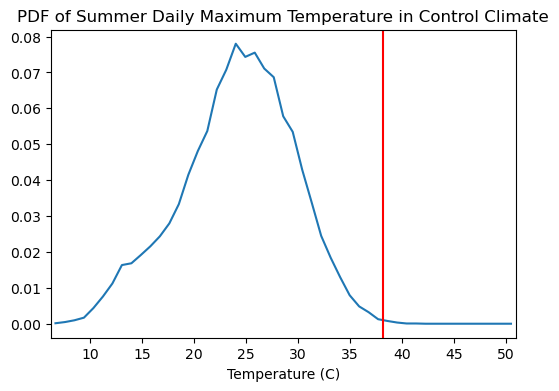

Average in control dataset: 24.156222075101223
Fraction of control with extreme value: 0.001117757235212374
Occurs once every 9.797658027637492 years


<Figure size 640x480 with 0 Axes>

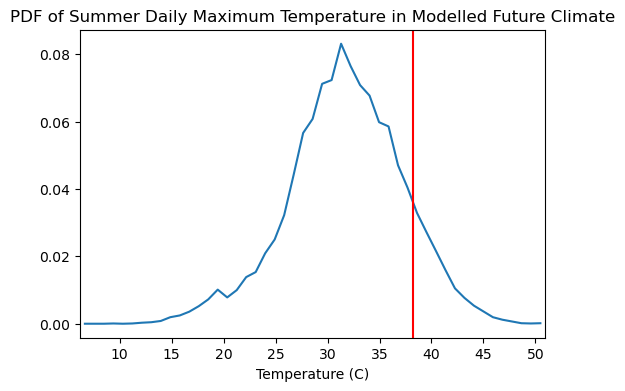

Average in future dataset: 31.72303534850546
Fraction of future with extreme value: 0.1156929347826087
Occurs once every 0.09465922157741521 years

 Shift by 7.566813273404236


<Figure size 640x480 with 0 Axes>

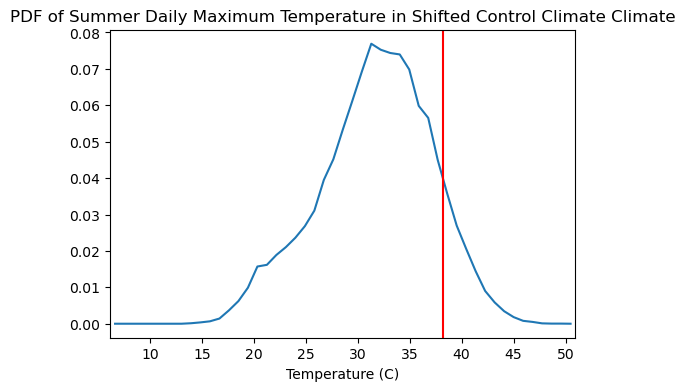

Average in shifted dataset: 31.72303534850547
Fraction of future with extreme value: 0.10724427527037642
Occurs once every 0.1021164357810105 years

 This Extreme Event is more common in the modelled future climate than shifted control climate


<Figure size 640x480 with 0 Axes>

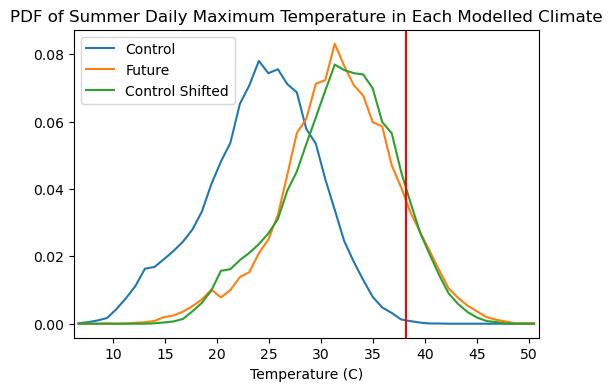

shifted extreme:  3550
shifted non-extreme:  29552
future extreme:  1703
future non-extreme:  13017
7.351988622373152
p value: 0.006698861801515346
This result is statistically significant


<Figure size 640x480 with 0 Axes>

In [10]:
# Extreme High daily maximum temperatures (summer)
perform_comparison(ctrl_max_summer.TREFHTMX, rcp_max_summer.TREFHTMX, True, "Summer Daily Maximum Temperature", "Temperature (C)")

threshold is 14.635759386721455


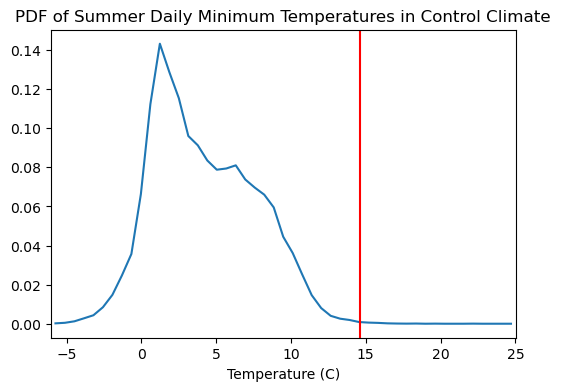

Average in control dataset: 4.174746002054279
Fraction of control with extreme value: 0.001117757235212374
Occurs once every 9.797658027637492 years


<Figure size 640x480 with 0 Axes>

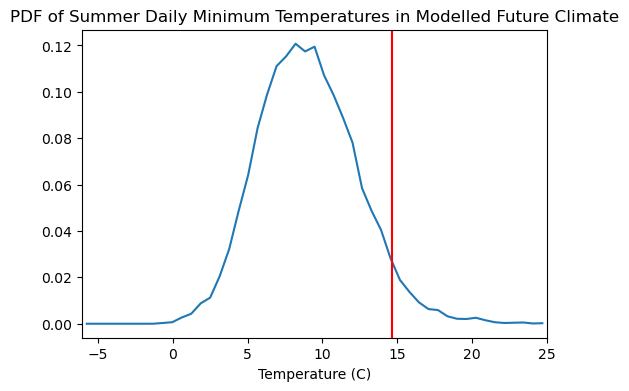

Average in future dataset: 9.057367985733718
Fraction of future with extreme value: 0.048641304347826084
Occurs once every 0.22514616528818174 years

 Shift by 4.882621983679439


<Figure size 640x480 with 0 Axes>

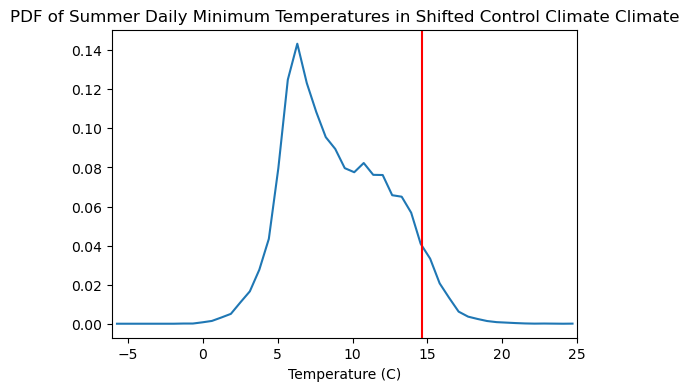

Average in shifted dataset: 9.057367985733718
Fraction of future with extreme value: 0.06192979276176666
Occurs once every 0.17683577903540842 years

 This Extreme Event is more common in the shifted control climate than the modelled future climate


<Figure size 640x480 with 0 Axes>

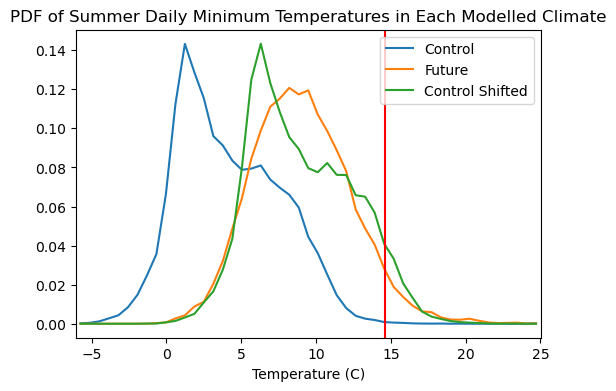

shifted extreme:  2050
shifted non-extreme:  31052
future extreme:  716
future non-extreme:  14004
32.77348616087536
p value: 1.0354761250048451e-08
This result is statistically significant


<Figure size 640x480 with 0 Axes>

In [11]:
# Extreme High daily minimum temperatures (summer)
perform_comparison(ctrl_min_summer.TREFHTMN, rcp_min_summer.TREFHTMN, True, "Summer Daily Minimum Temperatures", "Temperature (C)")

threshold is -35.85772701300478


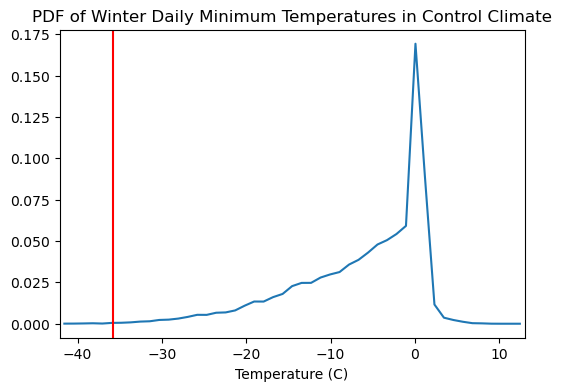

Average in control dataset: -6.254390902044324
Fraction of control with extreme value: 0.0011117287381878821
Occurs once every 9.850787132101301 years


<Figure size 640x480 with 0 Axes>

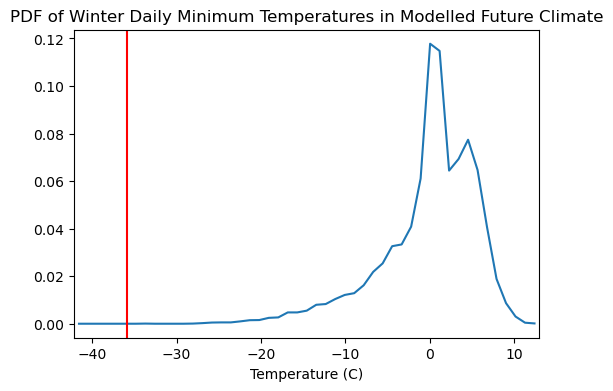

Average in future dataset: -0.07520203098941586
Fraction of future with extreme value: 0.0
Occurs once every infinity years

 Shift by 6.179188871054908


<Figure size 640x480 with 0 Axes>

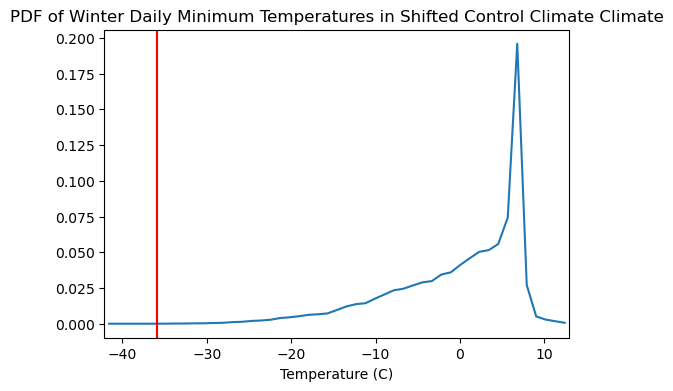

Average in shifted dataset: -0.0752020309894151
Fraction of future with extreme value: 3.088135383855228e-05
Occurs once every 354.62833675564684 years

 This Extreme Event is more common in the shifted control climate than the modelled future climate


<Figure size 640x480 with 0 Axes>

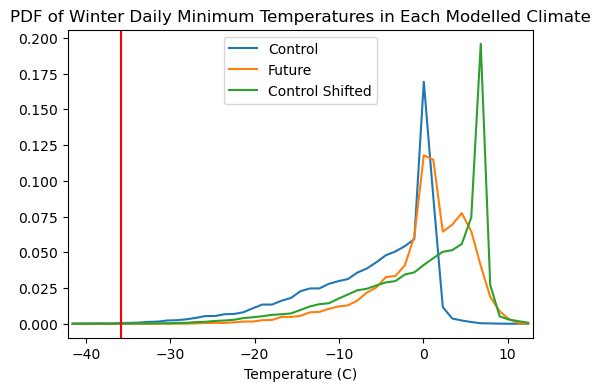

shifted extreme:  1
shifted non-extreme:  32381
future extreme:  0
future non-extreme:  14392
0.0
p value: 1.0
This result is NOT statistically significant


<Figure size 640x480 with 0 Axes>

In [12]:
# Extreme Low daily minimum temperatures (winter)
perform_comparison(ctrl_min_winter.TREFHTMN, rcp_min_winter.TREFHTMN, False, "Winter Daily Minimum Temperatures", "Temperature (C)")

threshold is 90.47306699866935


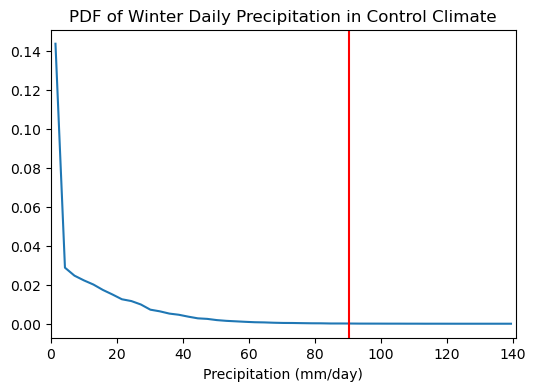

Average in control dataset: 11.52006869843666
Fraction of control with extreme value: 0.0010981912144702843
Occurs once every 9.972218867012923 years


<Figure size 640x480 with 0 Axes>

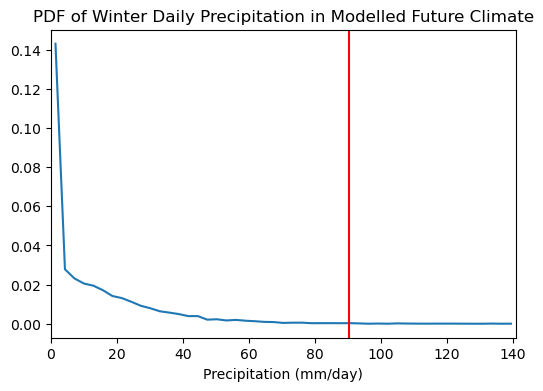

Average in future dataset: 12.49753353828287
Fraction of future with extreme value: 0.002987770983879933
Occurs once every 3.6654091654330423 years

 Shift by 0.9774648398462098


<Figure size 640x480 with 0 Axes>

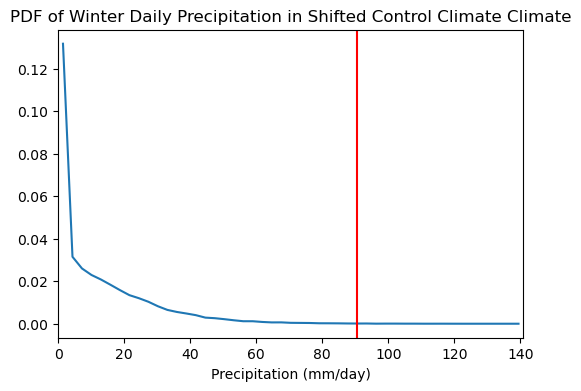

Average in shifted dataset: 12.49753353828287
Fraction of future with extreme value: 0.001178940568475452
Occurs once every 9.289190177491491 years

 This Extreme Event is more common in the modelled future climate than shifted control climate


<Figure size 640x480 with 0 Axes>

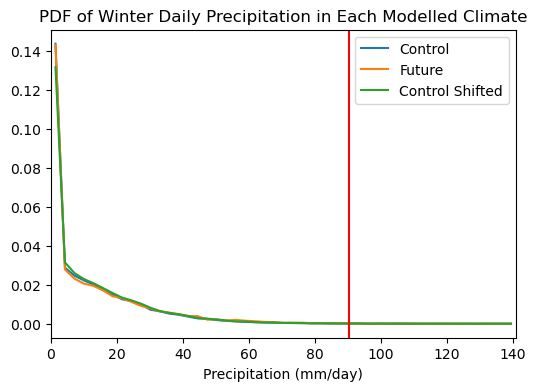

shifted extreme:  73
shifted non-extreme:  61847
future extreme:  43
future non-extreme:  14349
23.996231024260222
p value: 9.652446537061442e-07
This result is statistically significant


<Figure size 640x480 with 0 Axes>

In [13]:
# Extreme High daily precipitation (winter)
perform_comparison(ctrl_pcp_winter.PRECT, rcp_pcp_winter.PRECT, True, "Winter Daily Precipitation", "Precipitation (mm/day)")